# Exercise 09
The following exercise consists in solving the Travelling Salesman Problem by means of a genetic algorythm.
Specifically, we have a map of 32 cities and we have to find the shortest path that allows to visit once and only once all the cities before returning to the city of departure. 
Genetic algorythms are one possible way to face this problem. To apply them we consider a population of possible paths. Each path is charachterized by a sequence of integers from $1$ to $n=number of cities$ that encodes the travel details. For instance, the sequence [1,3,2,4,5] tells us that the salesman visits, in this order, cities 1,3,2,4 and 5, before going back to 1.
Once the population is randomly generated (1000 individuals in our case) according to the given constraints, we set off the evolution by introducing selection, crossover and mutation. Basically, two individuals are extracted from the population with a probability that favors individuals with lower cost function (shorter paths); then, crossover takes place by crossing the paths of the two selected individuals and two new paths are created. The new paths substitute the old ones and are then likely to mutate through 4 possible mutations.  

As an example, in our code we implement this operation as follows: we select individuals in the ordered population (according to the path length) with a random index given by $int(n_{ind}\times(unif(0,1))^2)$, we cross these two individuals with probability $p_{cross-over}=0.6$ and finally we mutate the offspring with probability $p_{mutation,total}=0.4$ (with each one of the 4 possible mutations having $p_{i-mutation}=0.1$).
At the end the most suitable individuals, namely the shortest paths, emerge.  

Two different maps are considered (circular and "random-in-square"). The results are shown below. As we can see, even when the optimal individual is found, the algorythm mantains a certain genetic variety that makes the average path over the best half of the population slightly different from the best path. This variety of different individuals that keep on being generated guarantees at sufficiently long times that there is no better path to be found. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from celluloid import Camera
from IPython.display import HTML

In [2]:
def plot_results(Map,n):
    
    best_path = np.loadtxt(f'{Map}/best_path.dat', delimiter=' ', unpack='true')
    best_half = np.loadtxt(f'{Map}/best_half.dat', delimiter=' ', unpack='true')

    x=np.arange(best_path.size)
    plt.plot(x, best_path, label=r'$L^{(2)}$')
    plt.plot(x, best_half, label=r'$\langle L^{(2)}\rangle$ best half')
    plt.xlabel('evolution steps')
    plt.ylabel(r'$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$')
    plt.grid(True)
    plt.legend()
    plt.title(r'COST FUNCTION $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$')

    print(f'best path lenght= {best_path[-1]}')
    
    
    
    
    
    cit_x,cit_y = np.loadtxt(f'{Map}/cities.dat', usecols=(0,1), delimiter=' ',unpack='True')
    best_chromo = np.loadtxt(f'{Map}/best_chromo.dat',usecols=np.arange(32), delimiter=' ')
    print(best_chromo[-1])
    
    x=[]
    y=[]

    for k in range(len(best_chromo)):
        x_=np.zeros(cit_x.size)
        y_=np.zeros(cit_x.size)

        for i in range(best_chromo[k].size):
            j=int(best_chromo[k][i])
            x_[i]=cit_x[j]
            y_[i]=cit_y[j]

        x.append(x_)
        y.append(y_)
    
    fig = plt.figure(figsize=(6,6))
    camera = Camera(fig)

    for i in range(n):     #max=len(best_chromo)
        plt.scatter(cit_x,cit_y)
        t=plt.plot(x[i],y[i])
        plt.grid('True')
        plt.title('BEST PATH PICTURE')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(t, [f'step {i}'])
        camera.snap()
    animation = camera.animate()
    plt.close()
    #animation.save('circle_best_path.gif')
    
    return animation
    


### 32 cities randomly placed on a circumference

best path lenght= 6.2403
[ 0.  7. 20. 13. 18.  9. 11. 12. 25. 21.  2.  6.  8. 31. 19. 15.  5. 17.
 27. 24. 26.  4. 30. 10.  3. 16. 28. 29. 22. 23.  1. 14.]


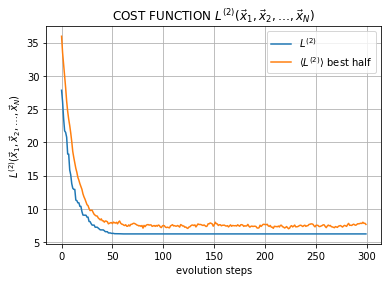

In [3]:
HTML(plot_results('circle',50).to_html5_video())

### 32 cities randomly placed inside a square

best path lenght= 9.27331
[ 0. 17. 30. 19. 22.  3.  6. 29. 31. 21.  1. 20. 13.  2. 15. 16. 18. 28.
 26.  4. 24. 12.  5. 27. 10. 23.  9. 25.  7.  8. 14. 11.]


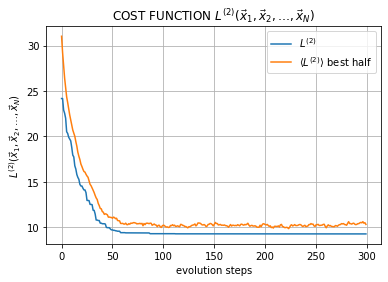

In [4]:
HTML(plot_results('Rnd_Square',100).to_html5_video())